# Exploratory Data Analysis (EDA)

<br>

**Author:** Ben Naismith (bnaismith@pitt.edu)  
**Date:** 11 June 2020

<br>

This tutorial provides a standard first step (EDA) in any data exploration and corpus analysis. It presents and demonstrates basic statistics of PELIC's composition, including the figures and statistics presented in the [`README.md`](https://github.com/ELI-Data-Mining-Group/PELIC-dataset/blob/master/README.md).

For further details about PELIC's frequency statistics, see the `corpus_stats` [folder](https://github.com/ELI-Data-Mining-Group/PELIC-dataset/tree/master/corpus_stats) and [notebook](http://localhost:8891/notebooks/PELIC-dataset/corpus_stats/frequency_stats.ipynb).

<br>

**Notebook contents:**
- [Initial setup](#Initial-setup)
- [Students](#Students)
- [Languages](#Languages)
- [Gender](#Gender)
- [Classes and semesters](#Classes-and-semesters)
- [Texts](#Texts)
- [Summary](#Summary)

## Initial setup
Importing necessary Python modules and `PELIC_compiled.csv` for analysis

In [1]:
# Importing necessary modules

import pandas as pd
import csv
from ast import literal_eval
import nltk
import matplotlib.pyplot as plt

In [2]:
# Read in PELIC_compiled.csv

pelic_df = pd.read_csv("../PELIC_compiled.csv", index_col = 'answer_id', # answer_id is unique
                      dtype = {'level_id':'object','question_id':'object','version':'object','course_id':'object'}, # str not ints
                               converters={'tokens':literal_eval,'tok_lem_POS':literal_eval}) # read in as lists
pelic_df.info()
pelic_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46230 entries, 1 to 48420
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   anon_id      46230 non-null  object
 1   L1           46230 non-null  object
 2   gender       46230 non-null  object
 3   course_id    46230 non-null  object
 4   level_id     46230 non-null  object
 5   class_id     46230 non-null  object
 6   question_id  46230 non-null  object
 7   version      46230 non-null  object
 8   text_len     46230 non-null  int64 
 9   text         46230 non-null  object
 10  tokens       46230 non-null  object
 11  tok_lem_POS  46230 non-null  object
dtypes: int64(1), object(11)
memory usage: 4.6+ MB


,anon_id,L1,gender,course_id,level_id,class_id,question_id,version,text_len,text,tokens,tok_lem_POS
answer_id,,,,,,,,,,,,
1,eq0,Arabic,Male,149,4,g,5,1,177,I met my friend Nife while I was studying in a...,"[I, met, my, friend, Nife, while, I, was, stud...","((I, i, PRP), (met, meet, VBD), (my, my, PRP$)..."
2,am8,Thai,Female,149,4,g,5,1,137,"Ten years ago, I met a women on the train betw...","[Ten, years, ago, ,, I, met, a, women, on, the...","((Ten, ten, CD), (years, year, NNS), (ago, ago..."
3,dk5,Turkish,Female,115,4,w,12,1,64,In my country we usually don't use tea bags. F...,"[In, my, country, we, usually, do, n't, use, t...","((In, in, IN), (my, my, PRP$), (country, count..."
4,dk5,Turkish,Female,115,4,w,13,1,6,I organized the instructions by time.,"[I, organized, the, instructions, by, time, .]","((I, i, PRP), (organized, organize, VBD), (the..."
5,ad1,Korean,Female,115,4,w,12,1,59,"First, prepare a port, loose tea, and cup.\nSe...","[First, ,, prepare, a, port, ,, loose, tea, ,,...","((First, first, RB), (,, ,, ,), (prepare, prep..."


## Students
- Total number of students
- Students by level

In [3]:
print('Total number of students:',len(set(pelic_df.anon_id)))

Total number of students: 1177


In [4]:
print('Number of students by level:',pelic_df.drop_duplicates('anon_id').level_id.value_counts().sort_index(ascending=False),sep='\n')

Number of students by level:
5    151
4    524
3    474
2     28
Name: level_id, dtype: int64


Here we see that the two most common levels are 4 (Upper-intermediate) and 3 (Intermediate), accounting for approximately 85% of the students. There are very few level 2 (Pre-Intermediate) students, as this class was not often held at the Pitt ELI. 

With respect to level 5 (Advanced), we shall see in the [Texts](#Texts) section that despite the smaller number of students, the output of texts is comparable to level 4. 

## Languages
- Number of learner first languages (L1s)
- Number of students by L1
- Number of students by L1 and level

In [5]:
print('Unique student L1s:',len(pelic_df.L1.unique()))

Unique student L1s: 30


In [6]:
print('Complete list of student L1s:',pelic_df.drop_duplicates(subset=['anon_id','level_id']).L1.value_counts(),sep='\n')

Complete list of student L1s:
Arabic               813
Korean               357
Chinese              340
Japanese             109
Spanish               84
Turkish               68
Thai                  52
Portuguese            25
Taiwanese             20
Other                 19
French                16
Italian               16
Russian               16
Hebrew                 8
Farsi                  7
Mongol                 6
Vietnamese             5
German                 4
English                4
Suundi                 3
Indonesian             2
Azerbaijani            2
Montenegrin            2
Polish                 2
Zulu                   1
Swedish                1
Hindi                  1
Russian,Ukrainian      1
Swahili                1
Romanian               1
Name: L1, dtype: int64


**Note**: The figures above count students multiple times if they produced texts in multiple levels. To eliminate these duplicates, delete 'level_id' from the subset in the line of code above.

From the 30 different L1s, there is a clear divide between the three most common L1s (Arabic, Chinese, Korean), the seven most common (Arabic, Chinese, Korean, Japanese, Spanish, Turkish, Thai) and the remaining 23. The following statistics will focus on these top seven which account for over 90% of all students.

In [7]:
target_lang = ['Arabic','Chinese','Korean','Japanese','Spanish','Thai','Turkish']  

Below are additional filters which can be applied if desired:
- languages to include
- versions of texts to include
- levels to include
- minimum text length

In this case, only the L1 filter is being applied.

In [8]:
filters = (pelic_df.L1.isin(target_lang)) \
          #& (pelic_df.version == 1) \
          #& (pelic_df.level_id != '2') \
          #& (pelic_df.text_len >= 10)

In [9]:
# Number of students per L1 and level

print(pelic_df[filters].groupby(['L1', 'level_id'])['anon_id'].nunique())

L1        level_id
Arabic    2            15
          3           244
          4           342
          5           212
Chinese   2             4
          3            86
          4           154
          5            96
Japanese  3            21
          4            53
          5            35
Korean    2             6
          3            88
          4           151
          5           112
Spanish   2             1
          3            18
          4            40
          5            25
Thai      3            10
          4            25
          5            17
Turkish   3            24
          4            32
          5            12
Name: anon_id, dtype: int64


## Gender
- Students by gender
- Texts by gender
- Students and L1 by gender

In [10]:
#Students and texts by gender

print('Total students by gender:', pelic_df.drop_duplicates('anon_id').gender.value_counts(),sep='\n')
print('\n\nTotal texts by gender:', pelic_df.gender.value_counts(),sep='\n')

Total students by gender:
Male       623
Female     500
Unknown     54
Name: gender, dtype: int64


Total texts by gender:
Male       25352
Female     19488
Unknown     1390
Name: gender, dtype: int64


In [11]:
# Number of students per L1 and gender

print(pelic_df[filters].groupby(['L1', 'gender'])['anon_id'].nunique())

L1        gender 
Arabic    Female      90
          Male       337
          Unknown     12
Chinese   Female     108
          Male        77
          Unknown     35
Japanese  Female      45
          Male        22
Korean    Female     119
          Male        92
          Unknown      3
Spanish   Female      37
          Male        19
          Unknown      1
Thai      Female      17
          Male        14
Turkish   Female      21
          Male        19
Name: anon_id, dtype: int64


## Classes and semesters
- Number of courses for each class type
- Number of texts produced in each class type
- Number of semesters attended by each student
- Average number of semesters attended

In [12]:
# Texts produced in each class type

pelic_df.drop_duplicates('course_id').class_id.value_counts()

w    137
g    127
r    105
l     17
s      2
Name: class_id, dtype: int64

In [13]:
# Texts produced in each class type

pelic_df.class_id.value_counts()

r    17347
w    14873
g    12906
l     1067
s       37
Name: class_id, dtype: int64

From the above 'classes' statistics, we see that there is a relatively even balance between texts produced in 'Reading', 'Writing', and 'Grammar' classes.

In [14]:
# Adding a 'semester' column to pelic_df based on the information in course.csv and mapped using the course_id

course_df = pd.read_csv("../corpus_files/course.csv", index_col='course_id')
course_semester_dict = pd.Series(course_df.semester.values,course_df.index).to_dict()
course_semester_dict = {str(key): value for key, value in course_semester_dict.items()}
pelic_df['semester'] = pelic_df['course_id'].map(course_semester_dict)

In [15]:
# Number of semesters attended

semesters = pelic_df.drop_duplicates(subset=['anon_id','semester'])
semesters = semesters[['anon_id','semester']]
print(semesters.anon_id.value_counts().value_counts())

1    555
2    407
3    168
4     38
5      8
6      1
Name: anon_id, dtype: int64


In [16]:
print('Number of unique student/semester combos',len(pelic_df.drop_duplicates(subset=['anon_id', 'semester'])))
print('Average number of semesters per student',round(len(pelic_df.drop_duplicates(subset=['anon_id', 'semester']))/len(set(pelic_df.anon_id)),2))

Number of unique student/semester combos 2071
Average number of semesters per student 1.76


## Texts
- Total number of texts
- Total number of tokens
- Total number of word types
- Total number of lemma types
- Tokens by class type
- Tokens by level
- Different version of texts
- Number of texts per L1 and level
- Mean, Std, and SE text length by level

In [17]:
# Overall totals of text, tokens, word types, lemma types

print('Number of texts:',len(pelic_df))
print('Number of tokens:',sum(pelic_df.text_len))

pelic_df['tok_POS'] = pelic_df.tok_lem_POS.apply(lambda row: [(x[0],x[2]) for x in row])
print('Number of word types:',len(set([x for y in pelic_df.tok_POS.to_list() for x in y])))

pelic_df['lem_POS'] = pelic_df.tok_lem_POS.apply(lambda row: [(x[1],x[2]) for x in row])
print('Number of lemma types:',len(set([x for y in pelic_df.lem_POS.to_list() for x in y])))

Number of texts: 46230
Number of tokens: 4250703
Number of word types: 84429
Number of lemma types: 73286


**Note:** The above word and lemma type counts take into account part-of-speech so that, e.g., _bow_ (v) and _bow_ (n) are considered unique types. To recalculate without consideration of part of speech, delete the _x[2]_ from the code.

In [18]:
# Tokens by class type

pelic_df.groupby('class_id').sum()

,text_len
class_id,
g,928635
l,65127
r,598342
s,3700
w,2654899


In [19]:
# Tokens by level

pelic_df.groupby('level_id').sum()

,text_len
level_id,
2,29745
3,637359
4,1952868
5,1630731


In [20]:
# Number of versions

print(pelic_df.version.value_counts())

1     41589
2      4032
3       583
4         3
7         2
8         2
5         2
9         2
6         2
10        2
21        1
12        1
15        1
17        1
14        1
13        1
20        1
18        1
19        1
11        1
16        1
Name: version, dtype: int64


The above table shows that the vast majority (99.9%) of texts had a maximum of three versions, with most texts having one version (90%).

In [21]:
# Number of texts per L1 and level

pelic_df[filters].groupby(['L1', 'level_id']).size()

L1        level_id
Arabic    2            818
          3           5611
          4           5874
          5           4528
Chinese   2            146
          3           1901
          4           2939
          5           3517
Japanese  3            389
          4           1217
          5           1176
Korean    2            369
          3           1550
          4           3193
          5           4114
Spanish   2             89
          3            404
          4            730
          5            686
Thai      3            174
          4            660
          5            549
Turkish   3            534
          4            777
          5            227
dtype: int64

In [22]:
# Three aggregation functions: mean, standard deviation, and standard error

print('Average text length by level:\n',pelic_df[filters].groupby('level_id')['text_len'].mean().round(2),sep='\n')
print('\n\nStandard deviation text length by level:\n',pelic_df[filters].groupby('level_id')['text_len'].std().round(2),sep='\n')
print('\n\nStandard Error text length by level:\n',pelic_df[filters].groupby('level_id')['text_len'].sem().round(2),sep='\n')

Average text length by level:

level_id
2     18.31
3     53.84
4    115.63
5    100.17
Name: text_len, dtype: float64


Standard deviation text length by level:

level_id
2     27.59
3     72.68
4    150.12
5    196.11
Name: text_len, dtype: float64


Standard Error text length by level:

level_id
2    0.73
3    0.71
4    1.21
5    1.61
Name: text_len, dtype: float64


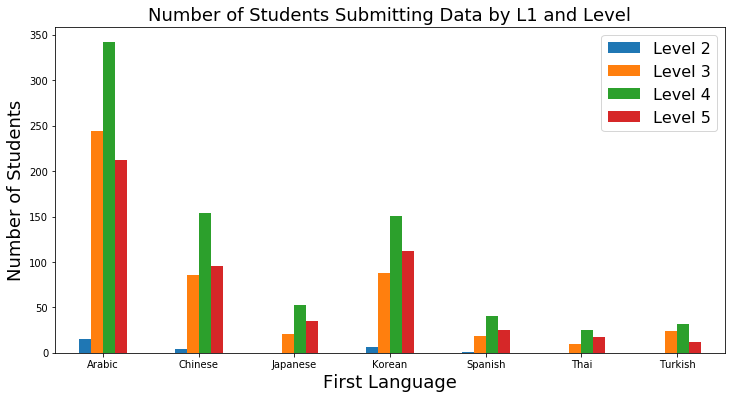

In [23]:
pelic_df[filters].groupby(['L1', 'level_id'])['anon_id'].nunique().unstack().plot.bar(figsize=(12,6))
plt.ylabel('Number of Students', fontsize=18)
plt.title('Number of Students Submitting Data by L1 and Level', fontsize=18)
plt.xlabel('First Language', fontsize=18)
plt.xticks(rotation=360)
plt.legend(prop={'size': 16}, labels=['Level 2', 'Level 3', 'Level 4', 'Level 5'])
plt.show()

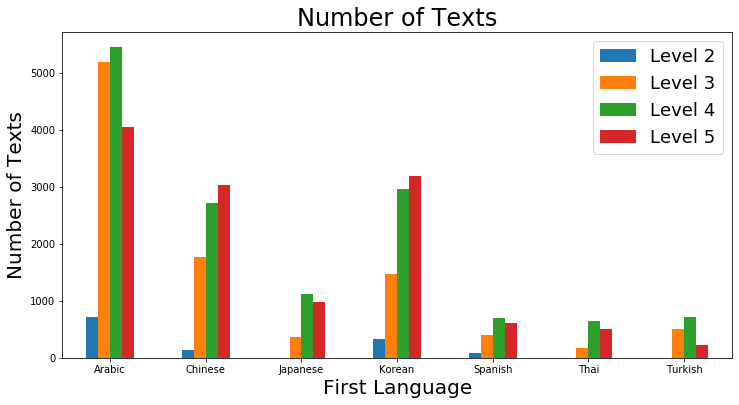

In [24]:
pelic_df[filters].groupby(['L1', 'level_id'])['text'].nunique().unstack().plot.bar(figsize=(12,6))
plt.ylabel('Number of Texts', fontsize=20)
plt.title('Number of Texts', fontsize=24)
plt.xlabel('First Language', fontsize=20)
plt.xticks(rotation=360)
plt.legend(prop={'size': 18}, labels=['Level 2', 'Level 3', 'Level 4', 'Level 5'])
plt.show()

## Summary

Overall from this EDA, we see that the data from PELIC has these broad characteristics:

- Approximately 1200 students, of which the majority (85%) are in levels 3 and 4
- Students have a wide range of 30 different L1s, with the most common being Arabic, Chinese, Korean, Japanese, Spanish, Turkish, and Thai.
- A balanced split of students who identified as male (53%) and female (43%)
- Nearly all texts and tokens come from Reading, Writing, and Grammar classes
- On average students attended 1.8 semesters
- There are approximately 4.2m tokens, 46k texts, 84k word types, and 73k lemma types
- Approximately 10% of texts have more than one version in the corpus
- Texts vary considerably in length, increase in average length by level

As a whole, we can therefore consider PELIC to be multilingual, longitudinal corpus with a wealth of raw text data, processed text data, and meta-data, affording opportunities for a wide range of research opportunities.

[Back to top](#Exploratory-Data-Analysis-(EDA))